<a href="https://colab.research.google.com/github/JCaballerot/Programacion_en_Python/blob/main/modulo5/An%C3%A1lisis_de_datos_con_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ctic.uni.edu.pe/wp-content/uploads/2022/04/588px-x-348px-web-1.png" alt="HTML5 Icon" width="900" height="350" >

<h1 align=center><font size = 5> UNIDAD V - ANÁLSIS DE DATOS CON PANDAS
</font></h1>

---

#Lectura de datasets

Importando librerías

In [1]:
import pandas as pd


In [2]:
pd.__version__

'1.3.5'

In [ ]:
!pip3 install pandas==1.3.5 -vvv -forced

In [75]:
# Leyendo archivo csv
pddf = pd.read_csv('train_titanic.csv')
pddf2 = pd.read_csv('sample_data/california_housing_train.csv')
# pddf: Pandas dataframe

In [38]:
pddf = pd.read_csv('train_titanic.txt', delimiter = '\t')
#pddf.columns = ['PassengerId',	'Survived',	'Pclass',	'Name',	'Sex',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare',	'Cabin',	'Embarked']

In [ ]:
# Tablas interactivas en pandas
pddf.head(10)

In [62]:
pddf.shape

(891, 12)

In [65]:
pddf.drop_duplicates().shape

(891,)

In [48]:
pddf.sort_values('Age', ascending = False, inplace = True)

In [55]:
pddf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S


In [69]:
# sorteando data
pddf.sort_values('Age', inplace = True)
pddf.sort_values(['Sex', 'Age'], inplace = True)


In [67]:
pddf.sort_index(inplace = True)

In [70]:
pddf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S


In [ ]:
# trabajando indices
pddf.reset_index(inplace = True)
pddf.reset_index(drop = True, inplace = True)

pddf.head(10)

Análisis simple de data

In [77]:
pddf.shape

(891, 12)

In [79]:
pddf.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [81]:
pddf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


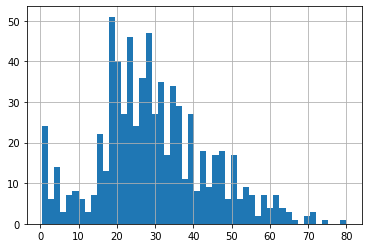

In [88]:
pd.set_option('display.float_format', lambda x: '%10.2f' % x)
pddf.Age.hist(bins = 50)


Creando variables nuevas

In [96]:
pddf_resume = pddf.describe().transpose()
pddf_resume['fill_rate'] = pddf_resume['count']/pddf.shape[0]
pddf_resume.head()

,count,mean,std,min,25%,50%,75%,max,fill_rate
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00,1.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00,1.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00,0.80
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00,1.00


In [97]:
pddf_resume = pddf.describe().transpose()
pddf_resume['fill_rate'] = pddf_resume['count']/pddf.shape[0]

pddf_resume.reset_index(drop = False, inplace = True)
pddf_resume

,index,count,mean,std,min,25%,50%,75%,max,fill_rate
0,PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00,1.00
1,Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00,1.00
2,Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00,1.00
3,Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00,0.80
4,SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00,1.00
5,Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00,1.00
6,Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33,1.00


Renombrando columnas



In [98]:
pddf_resume.rename(columns = {'index': 'variable',
                              'count':'N'}, inplace = True)
pddf_resume

,variable,N,mean,std,min,25%,50%,75%,max,fill_rate
0,PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00,1.00
1,Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00,1.00
2,Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00,1.00
3,Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00,0.80
4,SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00,1.00
5,Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00,1.00
6,Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33,1.00


Creando variables usando funciones apply



In [105]:
pddf['Age_2'] = pddf.Age.apply(lambda x: 0 if x < 30 else x**2)

In [ ]:
pddf

In [ ]:
from math import log

pddf[''] = pddf.app_PD.apply(lambda x: -log((1/x) - 1))
pddf[''] = pddf.app_PD.transform(lambda x: -log((1/x) - 1))


Creando agregaciones



In [107]:
pddf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,0.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,1444.00
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,0.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,1225.00
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,1225.00


In [108]:
pddf.Age.max()

80.0

In [109]:
pddf.Age.mean()

29.69911764705882

In [110]:
pddf.groupby('Sex')['Age'].mean()


Sex
female        27.92
male          30.73
Name: Age, dtype: float64

In [ ]:

pddf.groupby('Sex')['Age'].mean()
pddf.groupby('')[''].median()




In [112]:
pddf_res2 = pddf.groupby('Sex').aggregate({'PassengerId':'count',
                                        'Age': 'mean', 
                                        'Fare': 'mean'})

pddf_res2.reset_index(drop = False, inplace = True)
pddf_res2

,Sex,PassengerId,Age,Fare
0,female,314,27.92,44.48
1,male,577,30.73,25.52


Creando matriz de doble entrada



In [ ]:
pddf['Age_cat'] = pddf.Age.transform(lambda x: 1 if x > 18 else 0)
pddf['Fare_cat'] = pddf.Fare.transform(lambda x: 1 if x > 25 else 0)

pddf.head()


In [115]:
pd.crosstab(pddf.Age_cat, pddf.Fare_cat)

Fare_cat,0,1
Age_cat,,
0,213,103
1,344,231


In [116]:
pd.crosstab(pddf.Age_cat, pddf.Fare_cat, normalize = 'all')

Fare_cat,0,1
Age_cat,,
0,0.24,0.12
1,0.39,0.26


Series

In [ ]:
pddf.
pddf. < 0.10
pddf..mean()

In [ ]:
import numpy as np

np.array([[[1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10]]
         [[1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10]]])

a = np.array([1,2,3,4,5])
np.where( a > 3,  '>3', '<=3')


Filtros y Cruces



Filtros de filas



In [ ]:
pddf[0:4]
pddf[6:11]


pddf.iloc[[1,2,3,4,5,888]]

pddf.loc[pddf. == '']
pddf.loc[~(pddf. == '')]

pddf.loc[(pddf. == '') & (pddf. < 0.10)]
pddf.loc[(pddf. == '') | (pddf. < 0.10)]



Filtro de columnas



In [ ]:
pddf.columns
pddf.columns.tolist()


pddf_1 = pddf[['', '', '', '']]
pddf[pddf.columns.tolist()]
pddf_1.head()

Cruces

In [ ]:
pddf_2 = pddf[['', '', '', '']]

pd.merge(pddf_1, pddf_2, on = ['', ''], how = 'left')
pd.merge(pddf_1, pddf_2, how = 'left')
